In [8]:
#source: cap 12 do Time Series Analysis_ With Applications in R, Jonathan D. Cryer, Kung-Sik Chan 
install.packages('TSA')

Installing package into 'C:/Users/vinic/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'leaps', 'locfit'




package 'leaps' successfully unpacked and MD5 sums checked
package 'locfit' successfully unpacked and MD5 sums checked
package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vinic\AppData\Local\Temp\RtmpcJNDSG\downloaded_packages


In [11]:
library(TSA)

Warning message:
"package 'TSA' was built under R version 3.6.3"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [12]:
data(CREF)

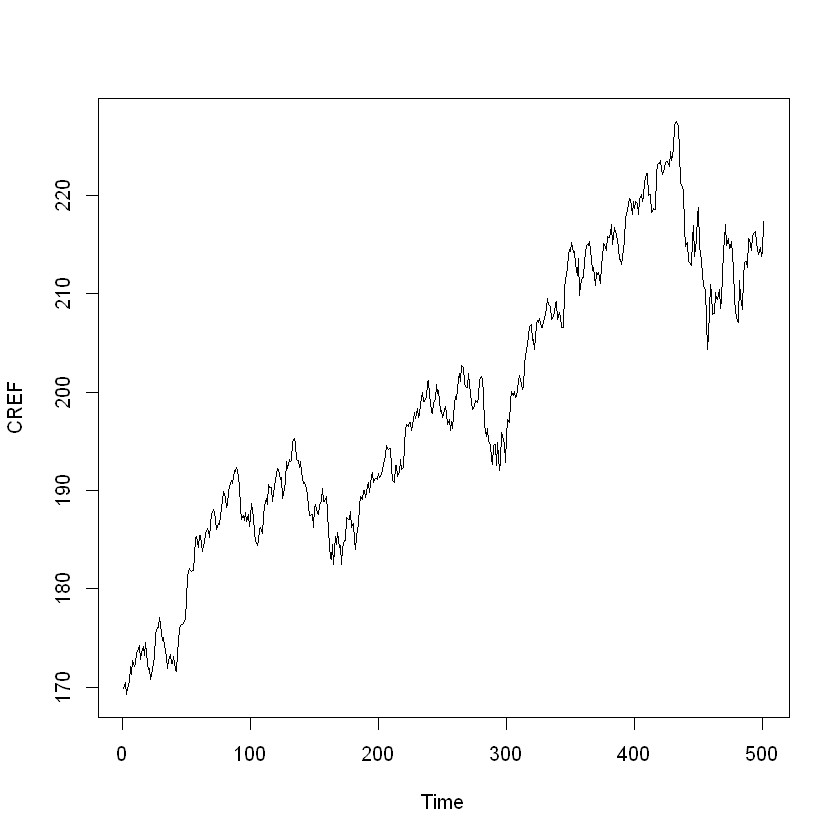

In [13]:
plot(CREF)

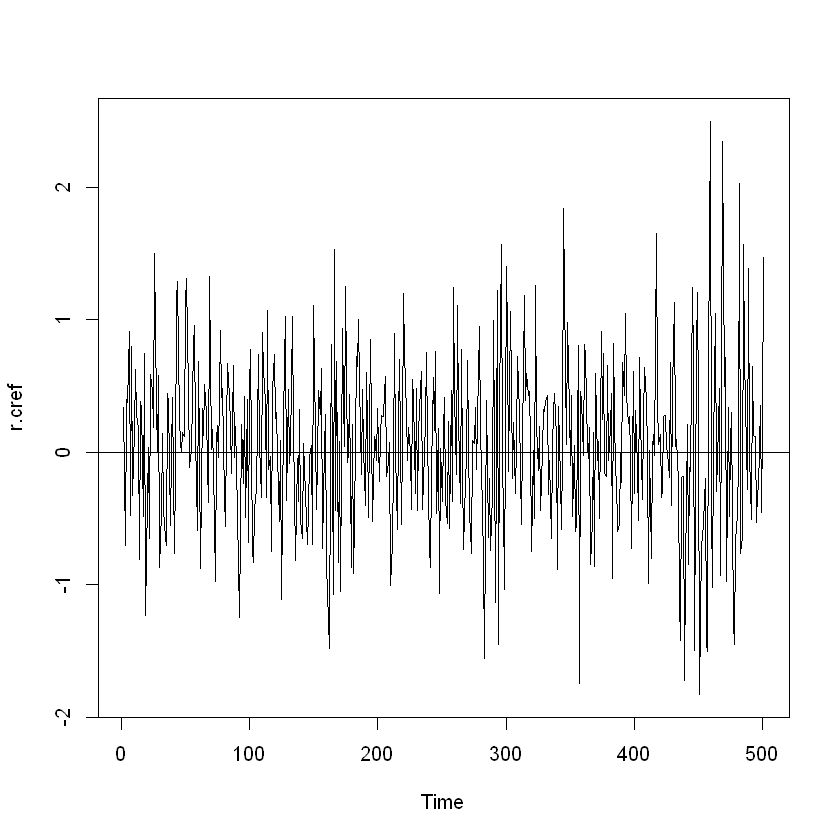

In [14]:
r.cref=diff(log(CREF))*100
plot(r.cref); abline(h=0)

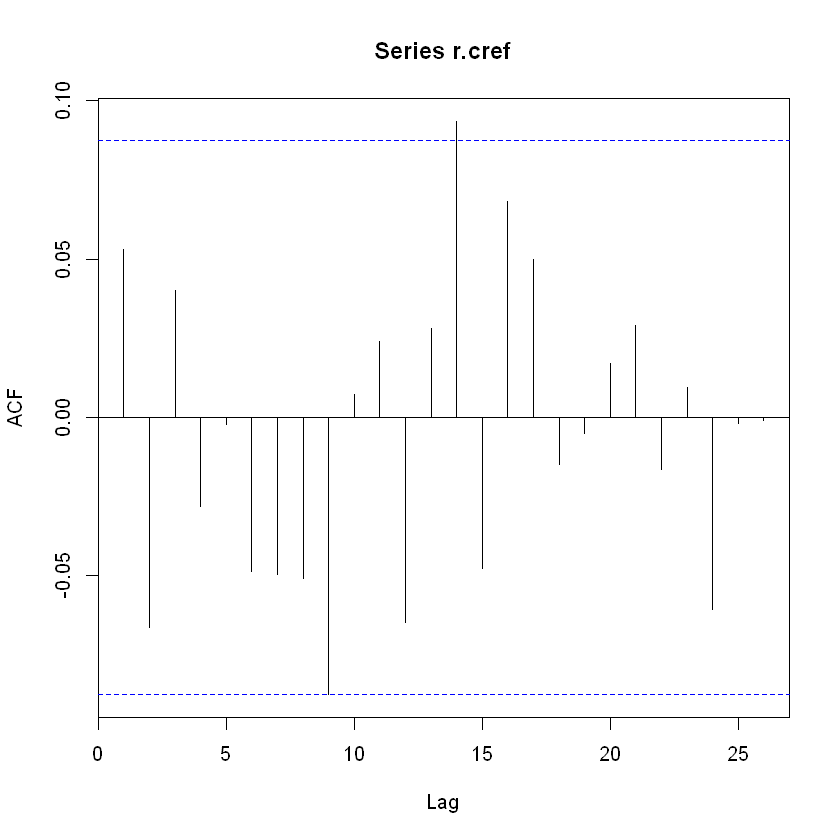

In [15]:
acf(r.cref) #olhando pros resíduos acho

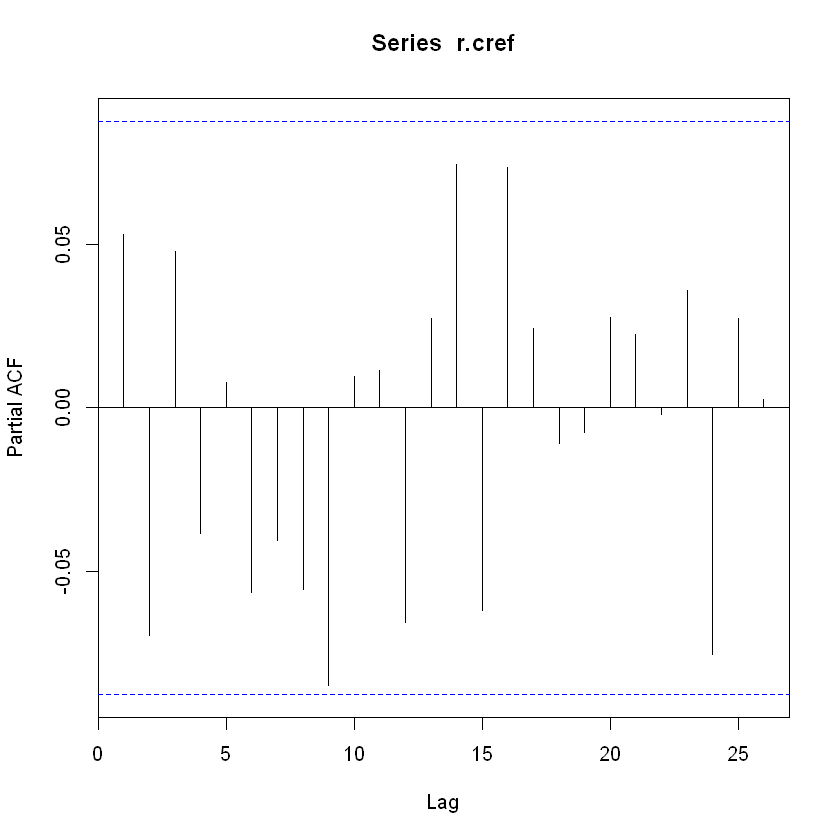

In [16]:
pacf(r.cref)

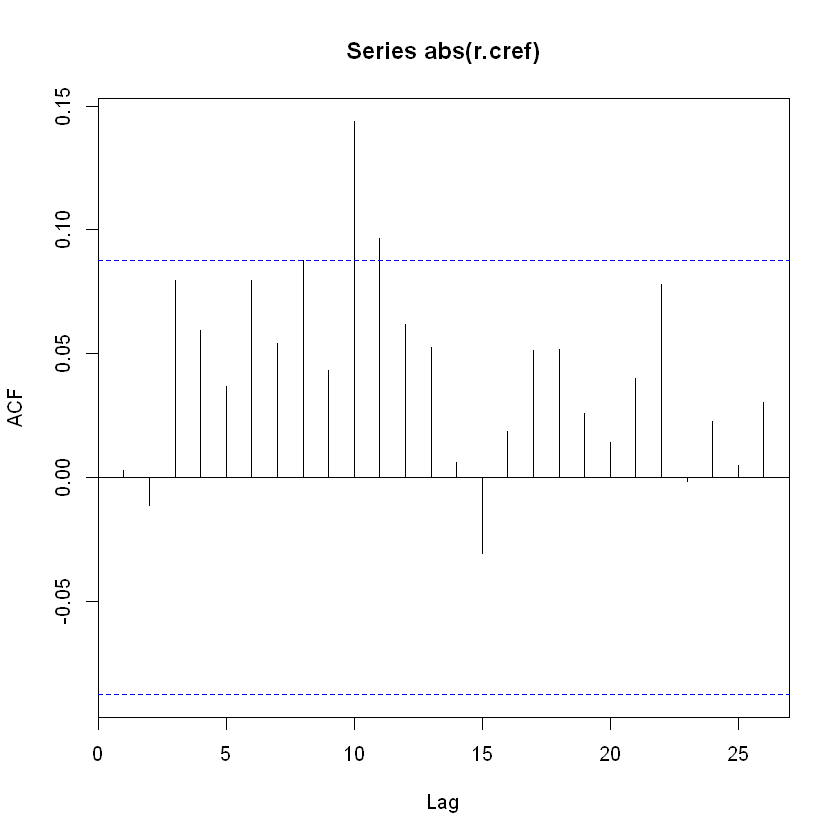

In [17]:
acf(abs(r.cref))

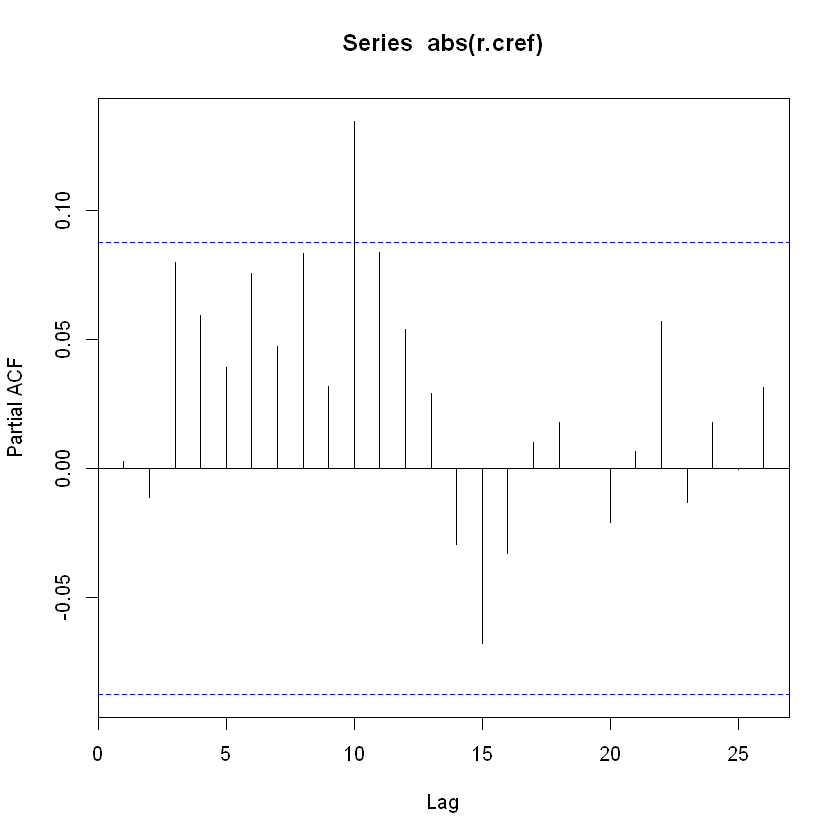

In [18]:
pacf(abs(r.cref))

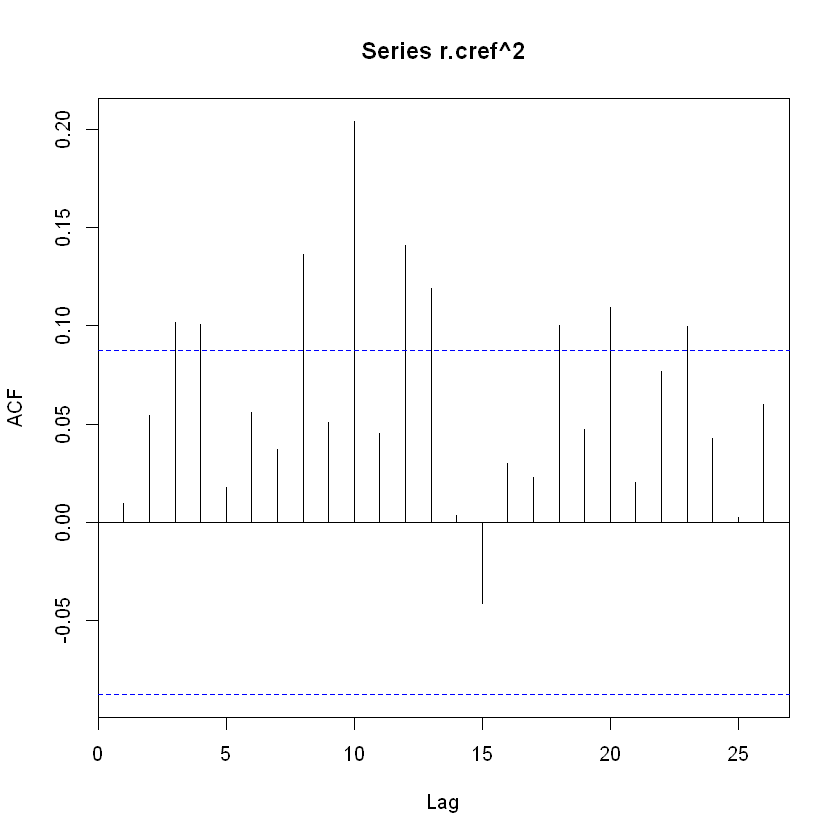

In [19]:
acf(r.cref^2)

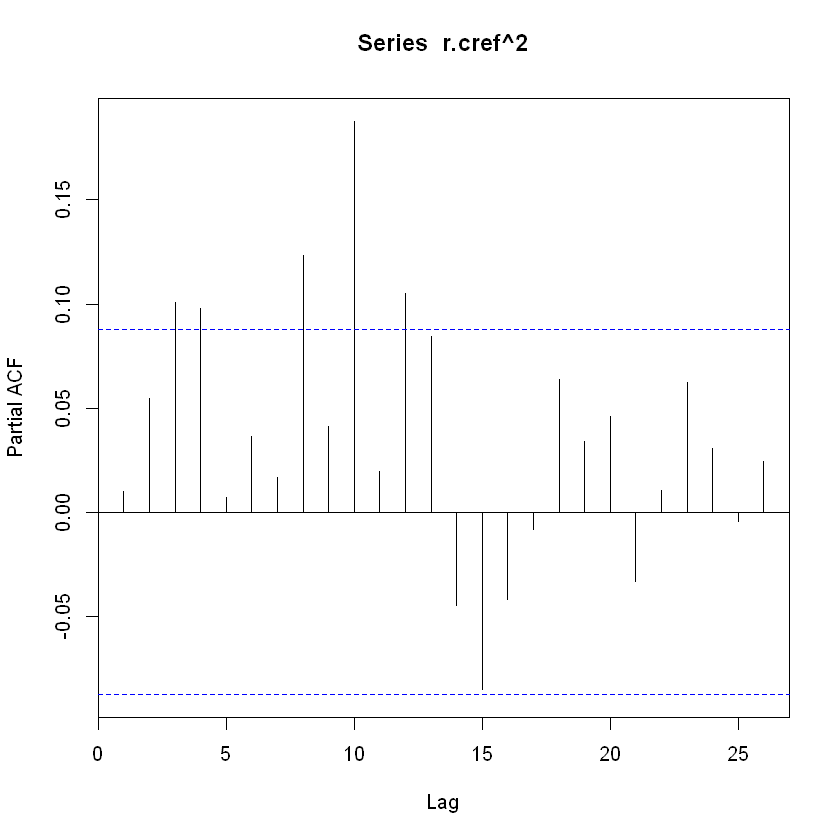

In [20]:
pacf(r.cref^2)

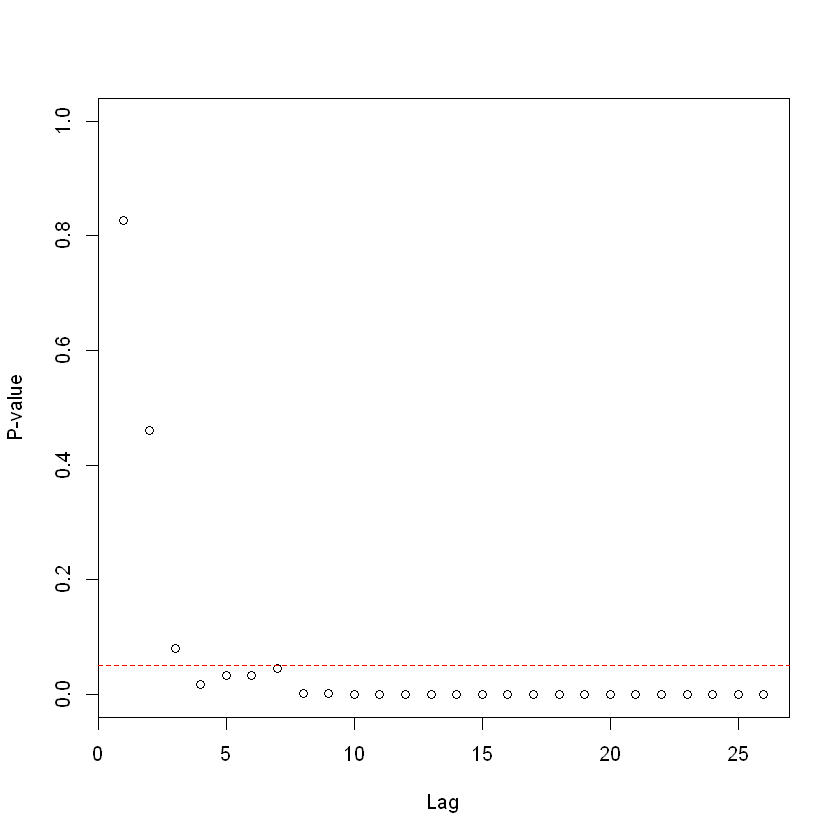

In [22]:
#win.graph(width=4.875, height=3,pointsize=8)
McLeod.Li.test(y=r.cref)

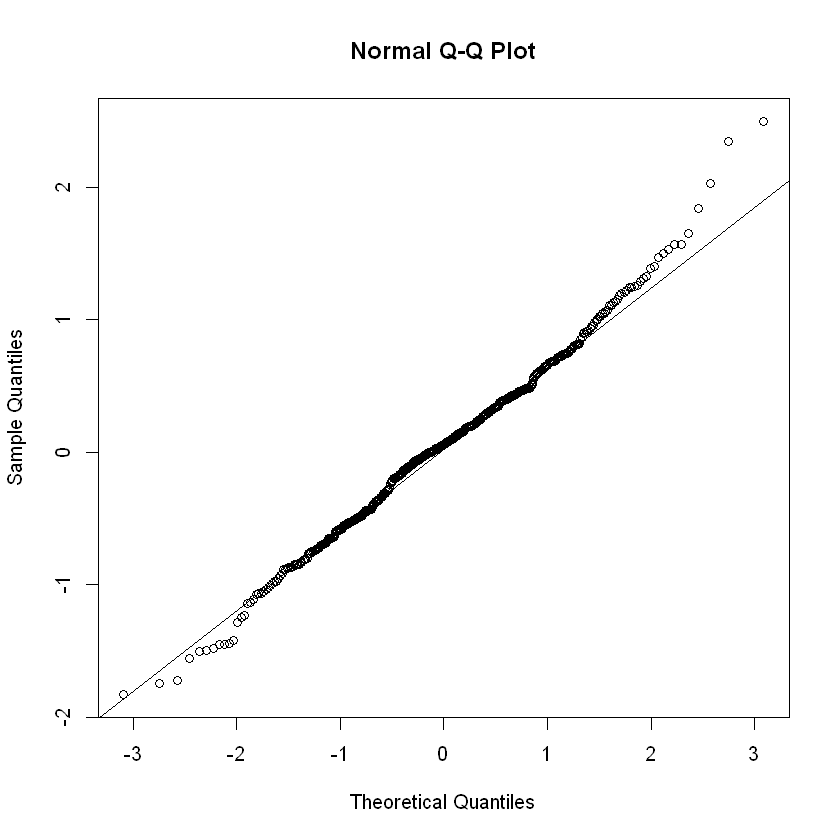

In [23]:
#win.graph(width=2.5,height=2.5,pointsize=8)
qqnorm(r.cref); qqline(r.cref)

In [24]:
skewness(r.cref)

[1] 0.1159736

In [25]:
kurtosis(r.cref)

[1] 0.6274013

In [27]:
JB=length(r.cref)*(skewness(r.cref)^2/6 + kurtosis(r.cref)^2/24)

In [28]:
JB

[1] 9.321497

In [29]:
1-pchisq(JB,df=2)

[1] 0.009459378

In [30]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



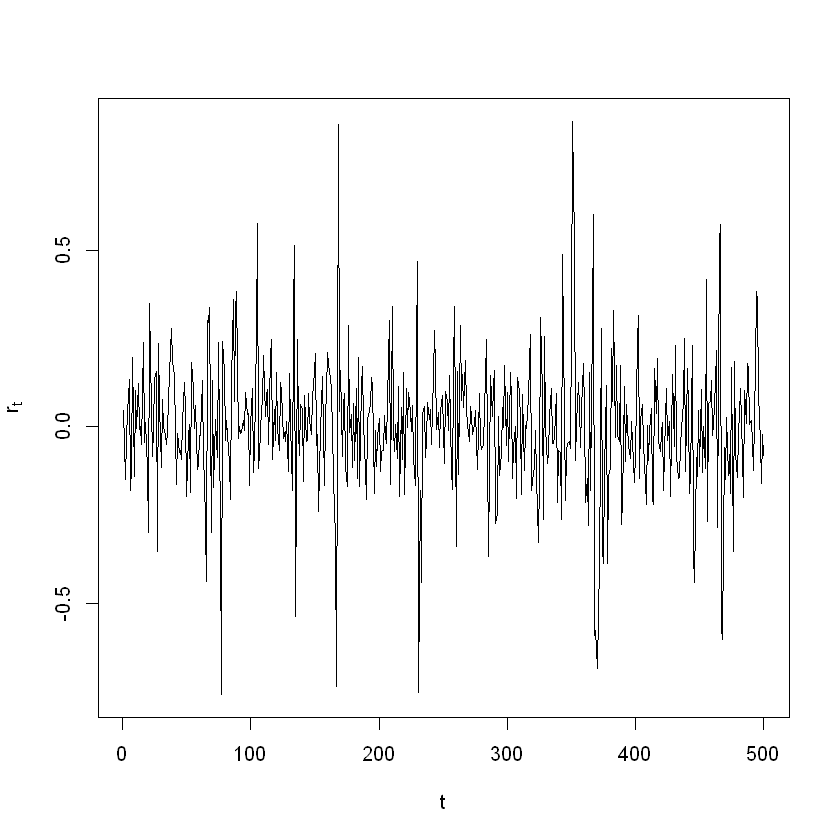

In [31]:
set.seed(1235678); 
library(tseries)

#só mostrar um arch
garch01.sim=garch.sim(alpha=c(.01,.9),n=500)
plot(garch01.sim,type='l',ylab=expression(r[t]), xlab='t')

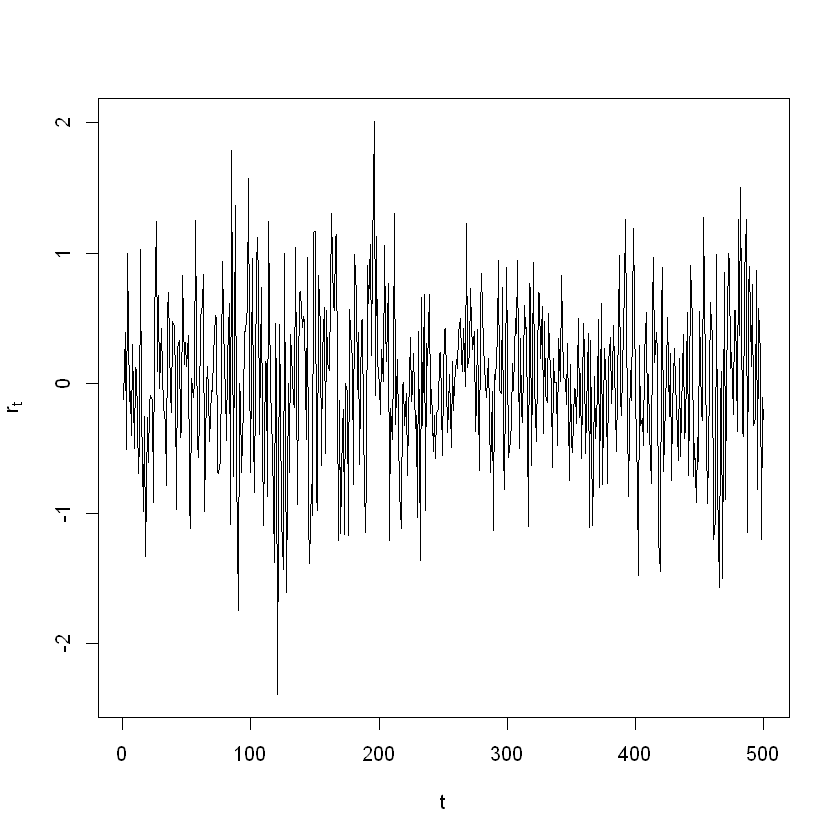

In [33]:
#simular garch

set.seed(1234567)
garch11.sim=garch.sim(alpha=c(0.02,0.05),beta=.9,n=500)
plot(garch11.sim,type='l',ylab=expression(r[t]), xlab='t')

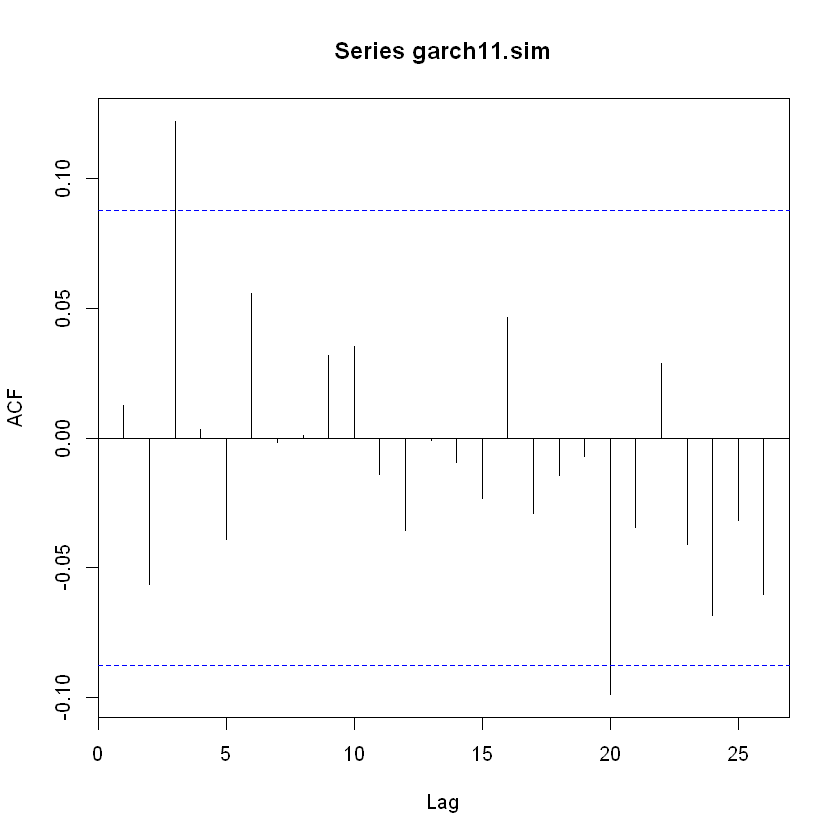

In [34]:
acf(garch11.sim)

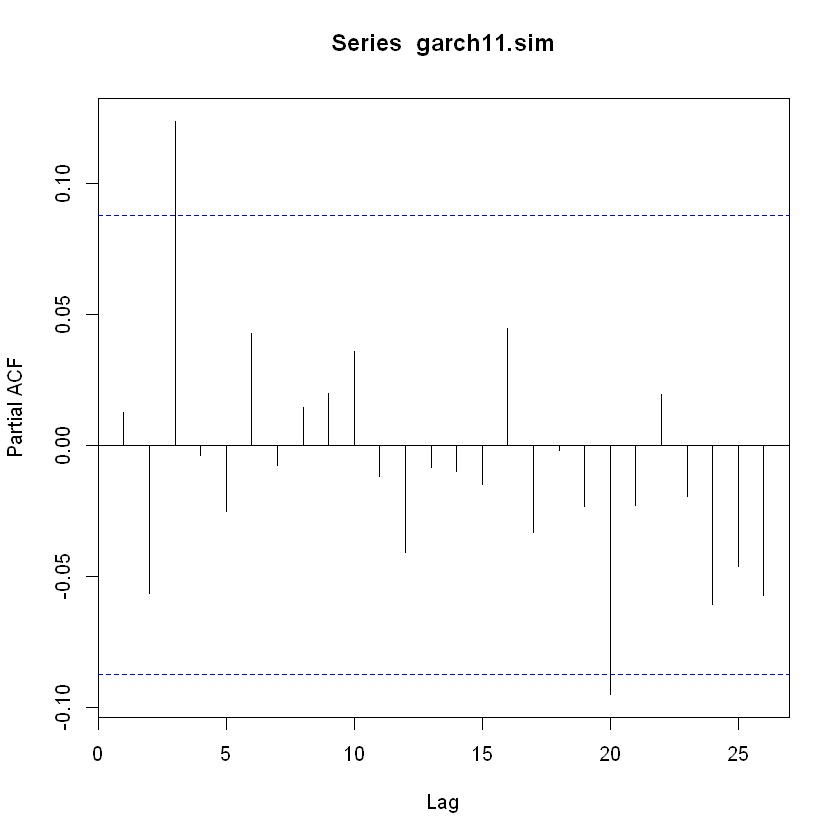

In [35]:
pacf(garch11.sim)

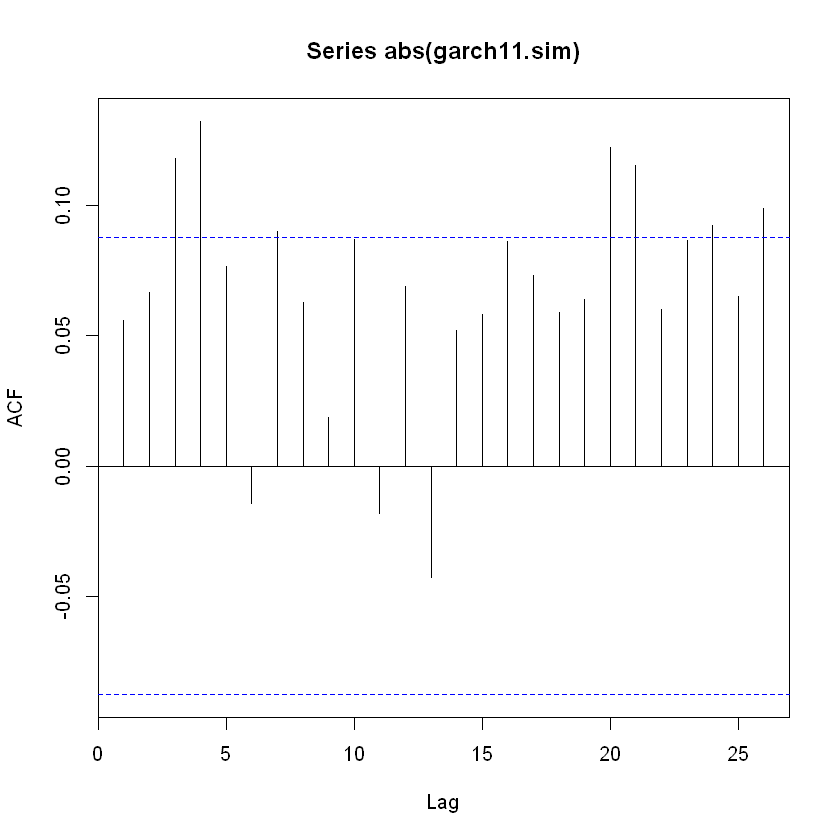

In [36]:
acf(abs(garch11.sim))

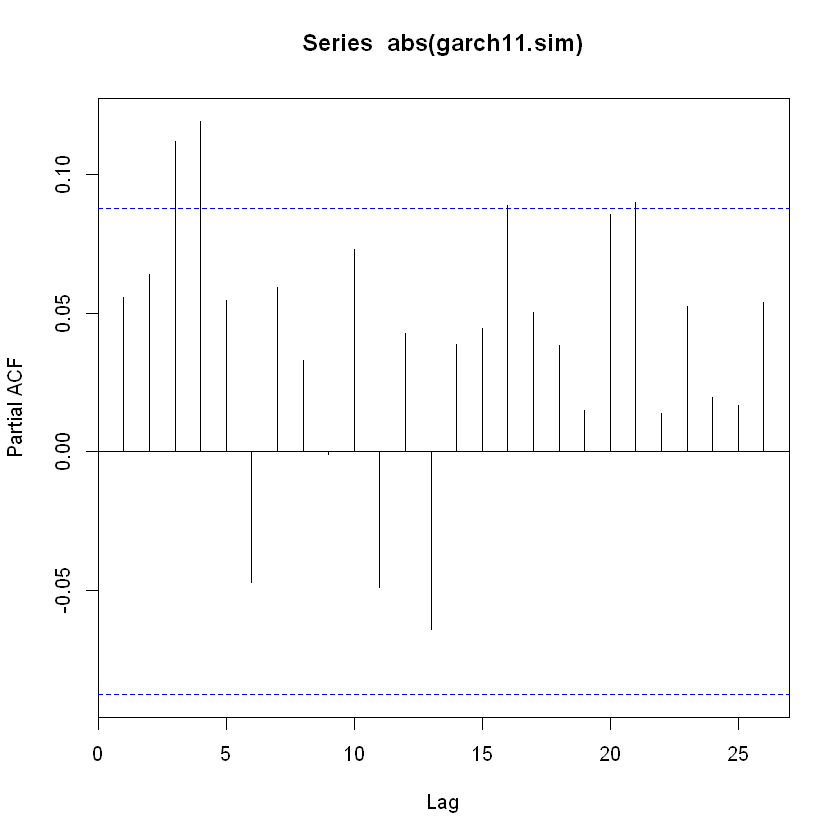

In [37]:
pacf(abs(garch11.sim))

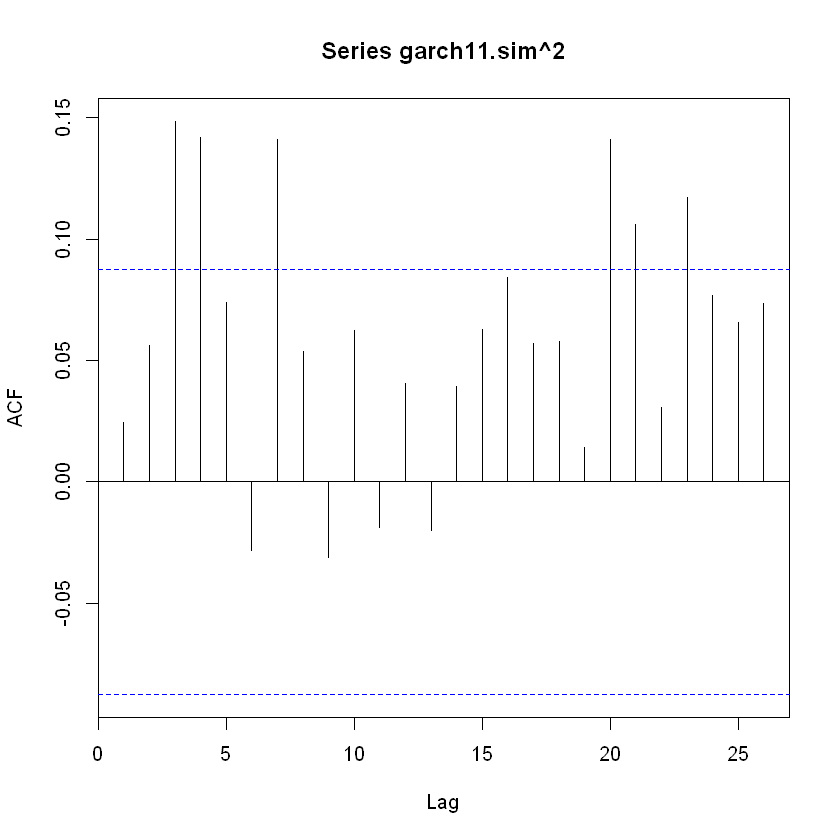

In [38]:
acf(garch11.sim^2)

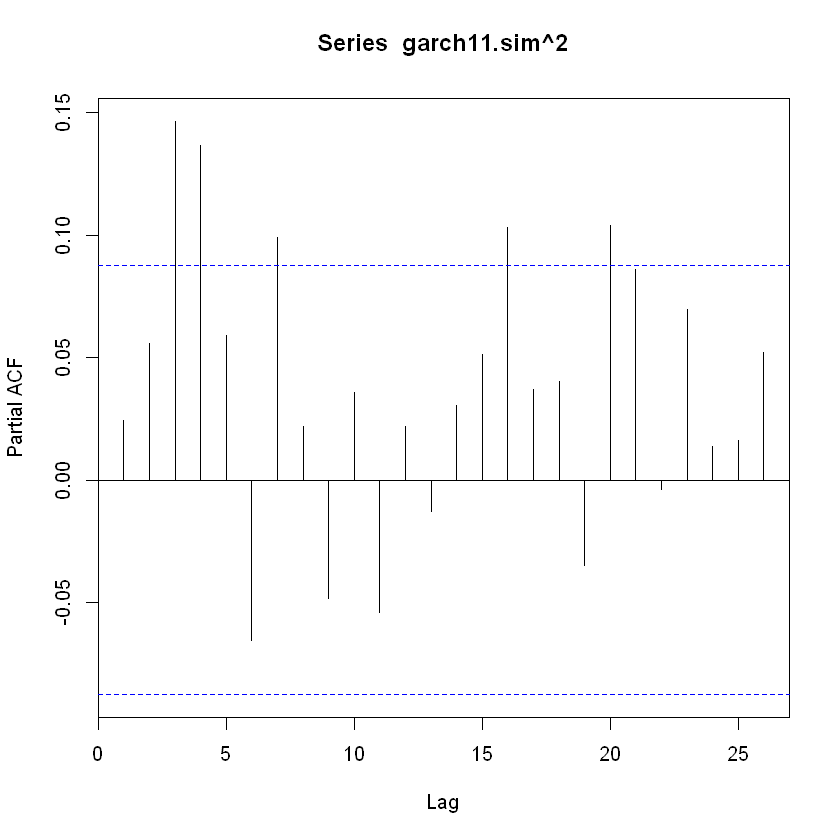

In [39]:
pacf(garch11.sim^2)

In [40]:
eacf((garch11.sim)^2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o x x o o x o o o o  o  o  o 
1 x o o o x o x x o o o  o  o  o 
2 x o o o o o x o o o o  o  o  o 
3 x x x o o x o o o o o  o  o  o 
4 x x o x x o o o o o o  o  o  o 
5 x o x x o o o o o o o  o  o  o 
6 x o x x o x o o o o o  o  o  o 
7 x x x x x x o o o o o  o  o  o 


In [41]:
eacf(abs(garch11.sim))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o x x o o x o o o o  o  o  o 
1 x o o o x o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x o o o x o o o o o  o  o  o 
4 x x o x o x o o o o o  o  o  o 
5 x o x x x o o o o o o  o  o  o 
6 x o x x x x o o o o o  o  o  o 
7 x x x x x o x o o o o  o  o  o 


In [42]:
eacf(abs(r.cref))

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o o o o o o o o o x x  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 x o o o o o o o o o o  o  o  o 
3 x o x o o o o o o o o  o  o  o 
4 x o x o o o o o o o o  o  o  o 
5 x x x x o o o o o o o  o  o  o 
6 x x x x o o o o o o o  o  o  o 
7 x x x x o o o o o o o  o  o  o 


In [43]:
arima(abs(garch11.sim),order=c(1,0,1))


Call:
arima(x = abs(garch11.sim), order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.9821  -0.9445     0.5077
s.e.  0.0134   0.0220     0.0499

sigma^2 estimated as 0.1486:  log likelihood = -232.97,  aic = 471.94

Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"



Call:
arima(x = abs(r.cref), order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.0013  0.0014     0.4983
s.e.     NaN     NaN     0.0185

sigma^2 estimated as 0.1694:  log likelihood = -265.58,  aic = 537.16

In [46]:
#pessimo fit
g1=garch(garch11.sim,order=c(2,2));
summary(g1)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     3.294364e-01     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00
     4     5.000000e-02     1.000e+00
     5     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1  2.661e+01
     1    4  2.641e+01  7.54e-03  1.69e-02  3.7e-02  5.1e+02  3.0e-02  4.31e+00
     2    5  2.609e+01  1.21e-02  1.87e-02  4.3e-02  2.0e+00  3.0e-02  1.50e+01
     3    6  2.573e+01  1.40e-02  1.46e-02  3.3e-02  2.0e+00  3.0e-02  6.06e+00
     4    9  2.279e+01  1.14e-01  1.06e-01  3.4e-01  1.8e+00  2.4e-01  6.46e+00
     5   11  2.225e+01  2.39e-02  2.80e-02  6.9e-02  2.0e+00  4.7e-02  2.82e+02
     6   12  2.157e+01  3.03e-02  3.31e-02  5.4e-02  2.0e+00  4.7e-02  3.50e+02
     7   13  2.111e+01  2.17e-02  2.66e-02  5.4e-02  2.0e+00  4.7e-02  1.76e+02
     8   15  2.105e+01  2.88e-03  1.23e-02  1.9e-02  2.0


Call:
garch(x = garch11.sim, order = c(2, 2))

Model:
GARCH(2,2)

Residuals:
      Min        1Q    Median        3Q       Max 
-3.346827 -0.631881  0.008473  0.736112  3.202344 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)  
a0 1.835e-02   1.515e-02    1.211   0.2257  
a1 9.976e-16   4.723e-02    0.000   1.0000  
a2 1.136e-01   5.855e-02    1.940   0.0524 .
b1 3.369e-01   3.696e-01    0.911   0.3621  
b2 5.100e-01   3.575e-01    1.426   0.1538  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 0.41859, df = 2, p-value = 0.8112


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.005298, df = 1, p-value = 0.942


In [47]:
#bom fit
g2=garch(garch11.sim,order=c(1,1))
summary(g2)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     3.706160e-01     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1  2.773e+01
     1    5  2.773e+01  2.16e-04  4.35e-04  4.2e-03  7.0e+02  4.2e-03  1.52e-01
     2    6  2.772e+01  2.97e-04  3.53e-04  5.2e-03  2.0e+00  4.2e-03  2.85e-01
     3    7  2.770e+01  5.63e-04  6.26e-04  8.8e-03  2.0e+00  8.3e-03  1.97e-01
     4   11  2.652e+01  4.27e-02  1.90e-02  3.8e-01  9.4e-01  2.7e-01  1.56e-01
     5   12  2.385e+01  1.01e-01  1.53e-01  4.4e-01  2.0e+00  5.3e-01  4.52e+01
     6   15  2.356e+01  1.24e-02  1.10e-01  6.4e-03  1.3e+01  1.0e-02  3.35e+00
     7   16  2.290e+01  2.81e-02  2.74e-02  6.5e-03  2.0e+00  1.0e-02  9.28e+00
     8   18  2.060e+01  1.00e-01  1.90e-01  4.7e-02  6.2e+00  7.5e-02  1.05e+00
     9   20  1.952e+01  5.22e-02  4.29e-02  3.5e-02 


Call:
garch(x = garch11.sim, order = c(1, 1))

Model:
GARCH(1,1)

Residuals:
      Min        1Q    Median        3Q       Max 
-3.307030 -0.637977  0.009156  0.741977  3.019441 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0  0.007575    0.007590    0.998   0.3183    
a1  0.047184    0.022308    2.115   0.0344 *  
b1  0.935377    0.035839   26.100   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 0.82911, df = 2, p-value = 0.6606


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.53659, df = 1, p-value = 0.4638


In [48]:
m1=garch(x=r.cref,order=c(1,1))
summary(m1)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     3.744782e-01     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1  3.221e+01
     1    4  3.210e+01  3.24e-03  4.13e-03  9.8e-03  1.3e+03  1.0e-02  2.74e+00
     2    6  3.201e+01  2.94e-03  6.22e-03  2.6e-02  3.4e+02  2.0e-02  3.50e+00
     3    7  3.199e+01  6.93e-04  2.39e-03  2.6e-02  1.9e+00  2.0e-02  1.17e-02
     4    8  3.194e+01  1.41e-03  1.29e-03  2.2e-02  1.9e+00  2.0e-02  8.47e-03
     5   12  2.932e+01  8.20e-02  1.41e-02  7.6e-01  0.0e+00  6.4e-01  1.79e-02
     6   14  2.612e+01  1.09e-01  5.98e-02  8.2e-02  2.0e+00  1.3e-01  5.17e+01
     7   16  2.593e+01  7.50e-03  4.26e-02  1.6e-02  2.0e+00  2.6e-02  1.15e+04
     8   17  2.518e+01  2.89e-02  3.40e-02  1.3e-02  2.0e+00  2.6e-02  3.98e+03
     9   19  2.512e+01  2.48e-03  5.40e-03  5.7e-03 


Call:
garch(x = r.cref, order = c(1, 1))

Model:
GARCH(1,1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.78577 -0.61949  0.08695  0.67933  3.30810 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0   0.01633     0.01237    1.320   0.1869    
a1   0.04414     0.02097    2.105   0.0353 *  
b1   0.91704     0.04570   20.066   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1.0875, df = 2, p-value = 0.5806


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.77654, df = 1, p-value = 0.3782


In [62]:
m1$coef

a0         a1         b1 
0.01632722 0.04414103 0.91704011

In [74]:
m1$coef[1]

a0 
0.01632722

In [75]:
#metadata
attributes(m1$coef)

$names
[1] "a0" "a1" "b1"

In [76]:
names(m1$coef)[1]

[1] "a0"

In [78]:
m1$coef[1] 

a0 
0.03265445

In [70]:
#omega/(1 - alpha - beta) é próximo da variancia da amost

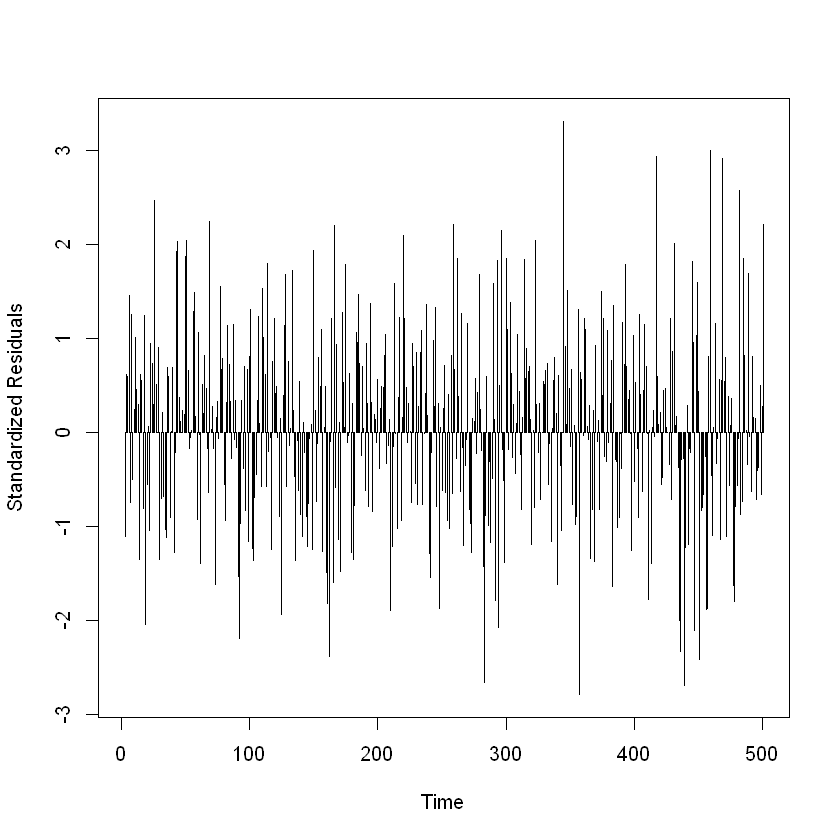

In [79]:
#teste QQ pra ver se o modelo faz sentido
plot(residuals(m1),type='h',ylab='Standardized Residuals')

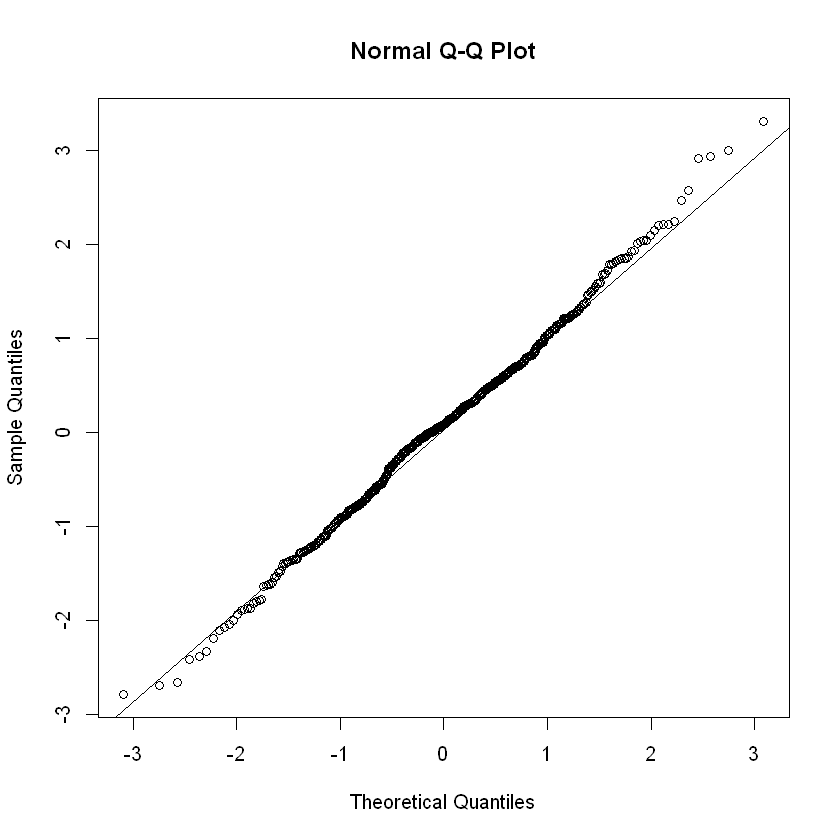

In [81]:
#win.graph(width=2.5,height=2.5,pointsize=8)
qqnorm(residuals(m1)); qqline(residuals(m1))

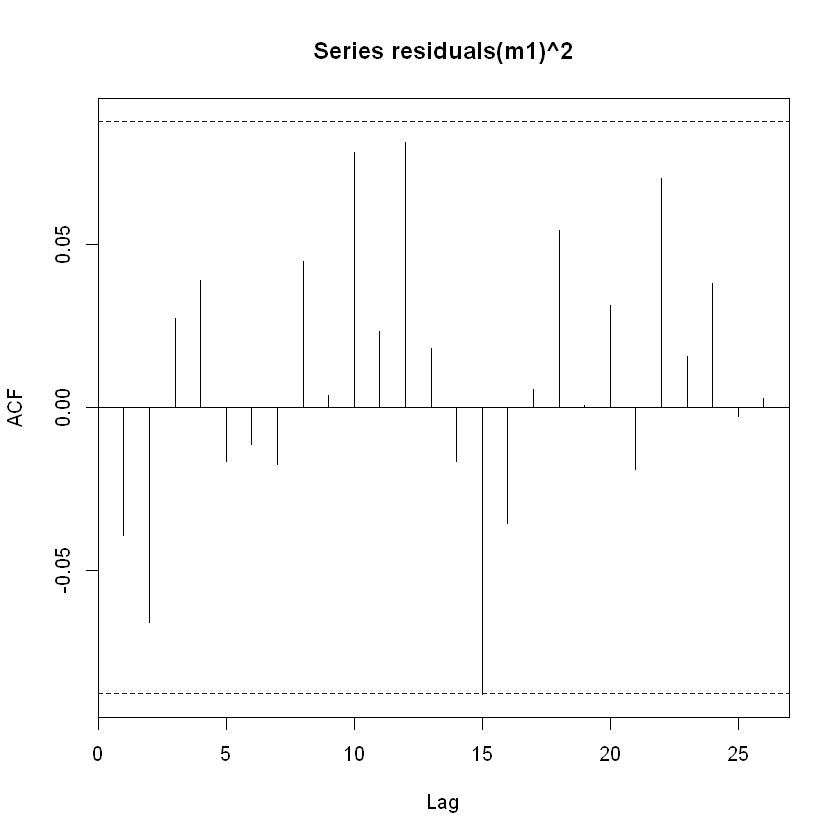

In [82]:
acf(residuals(m1)^2,na.action=na.omit)

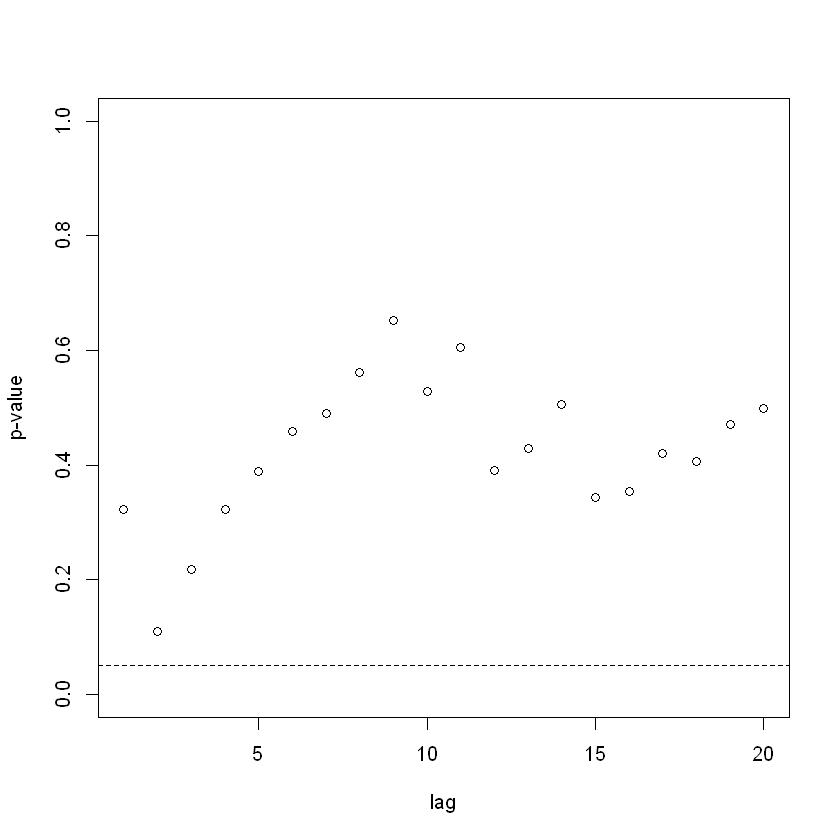

In [83]:
#portemanteau test
gBox(m1,method='squared')

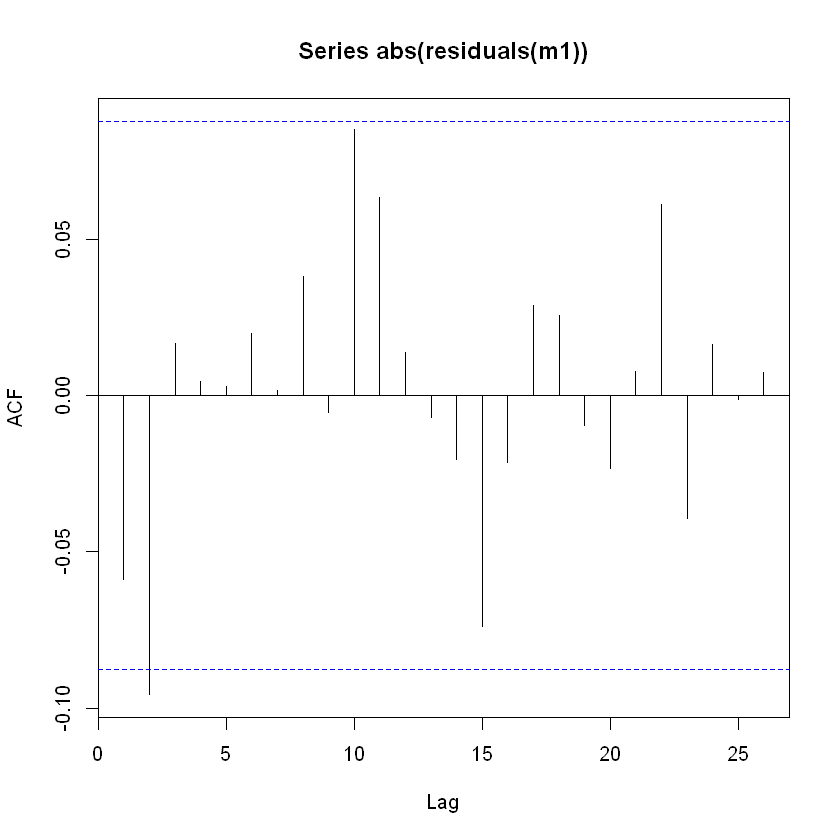

In [84]:
acf(abs(residuals(m1)),na.action=na.omit)

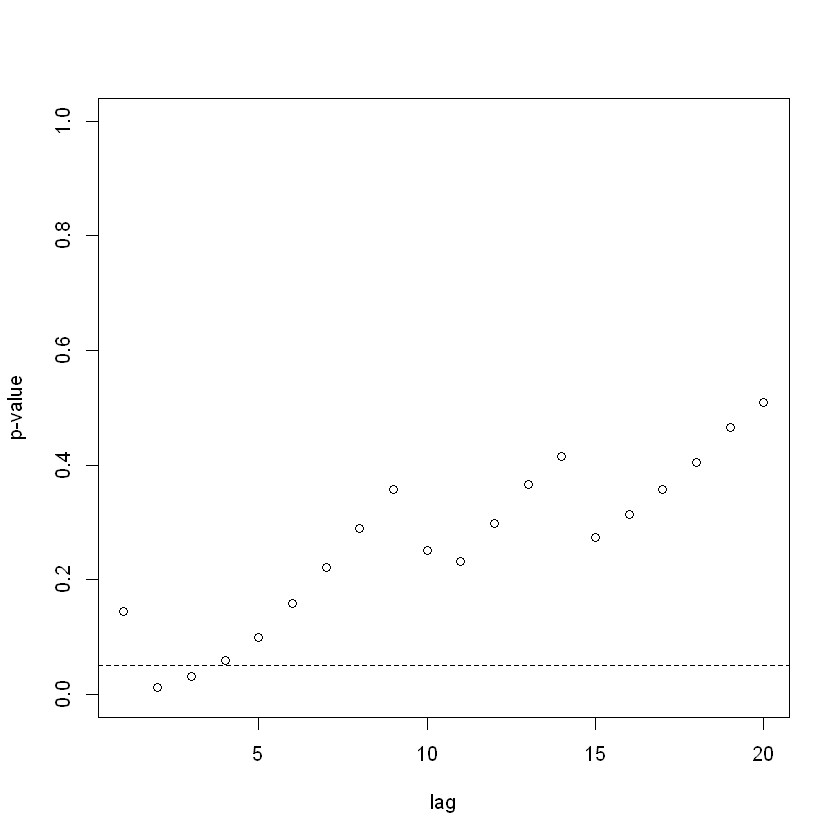

In [85]:
gBox(m1,method='absolute')

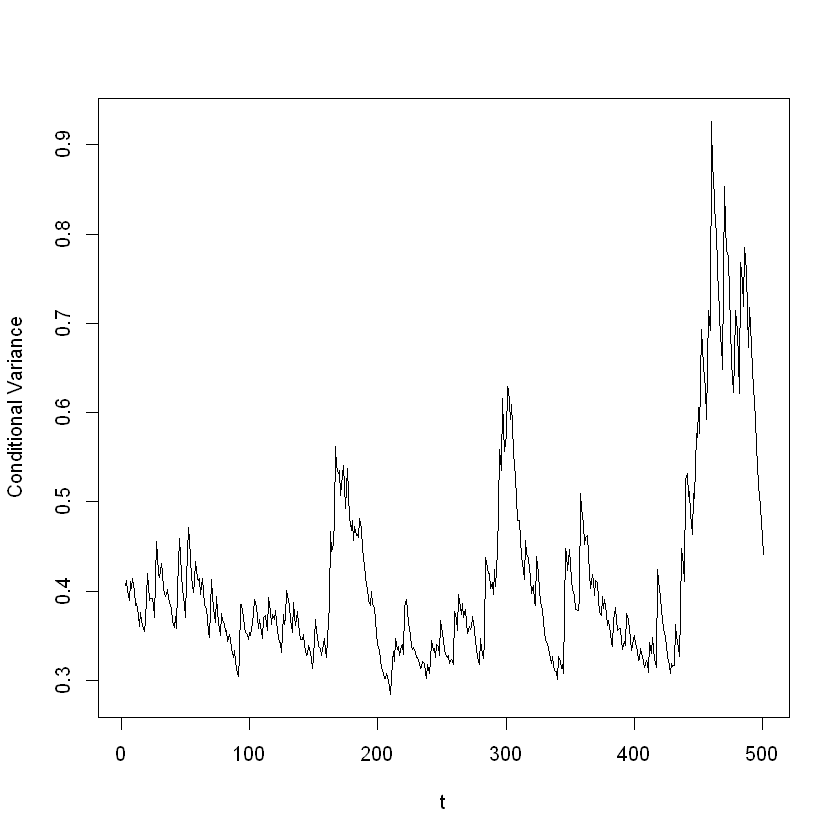

In [86]:
plot((fitted(m1)[,1])^2,type='l',ylab='Conditional Variance', xlab='t')

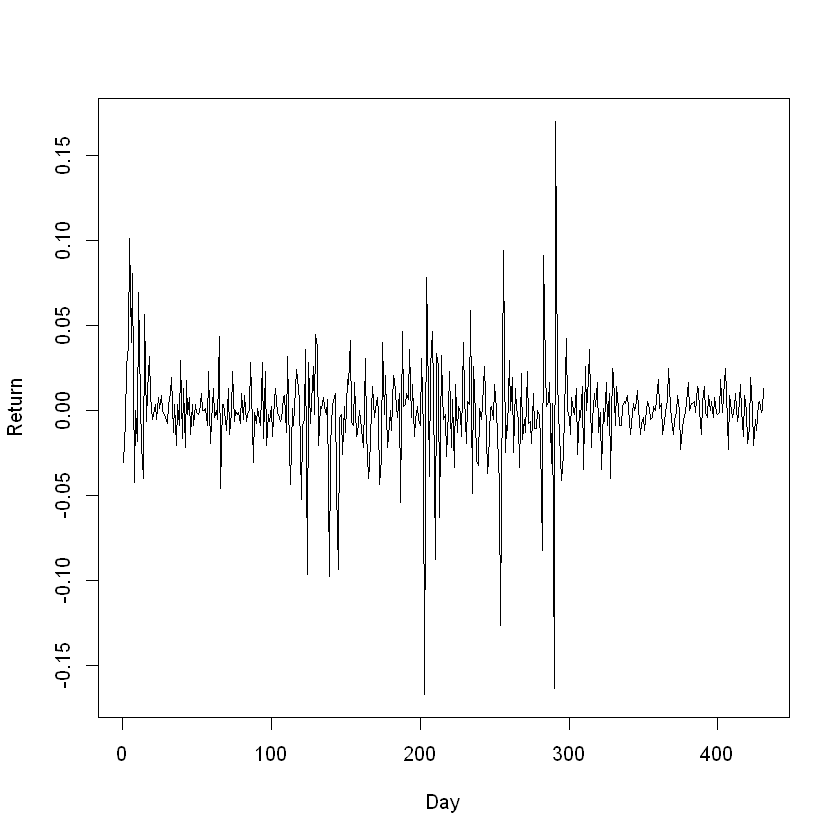

In [87]:
#outro exemplo
data(usd.hkd)

plot(ts(usd.hkd$hkrate,freq=1),type='l',xlab='Day',ylab='Return')

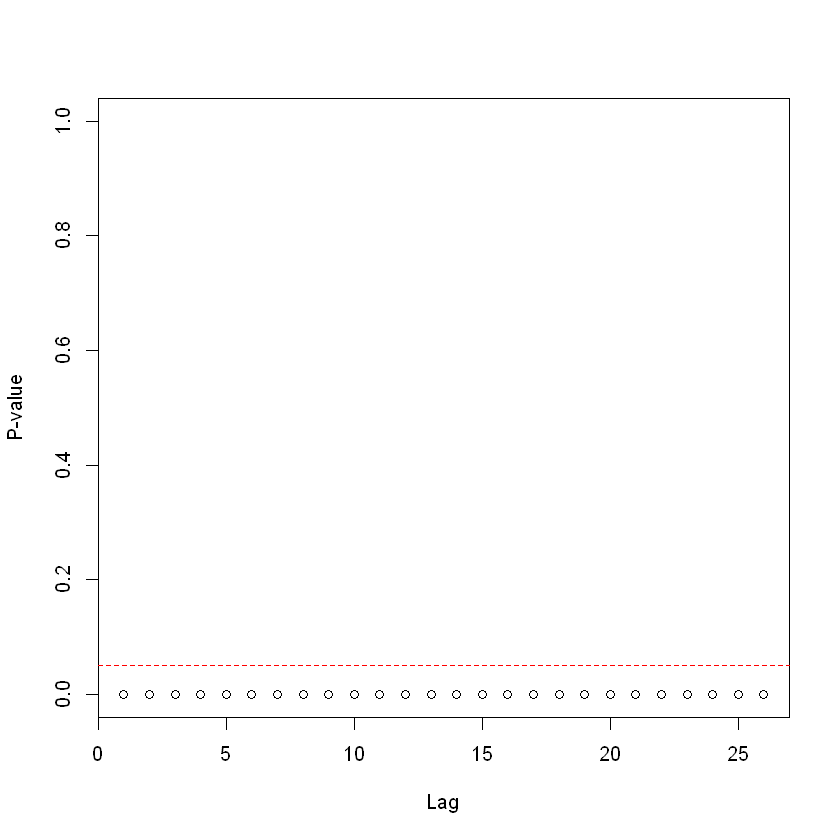

In [88]:
attach(usd.hkd)
McLeod.Li.test(arima(hkrate,order=c(1,0,0), xreg=data.frame(outlier1)))

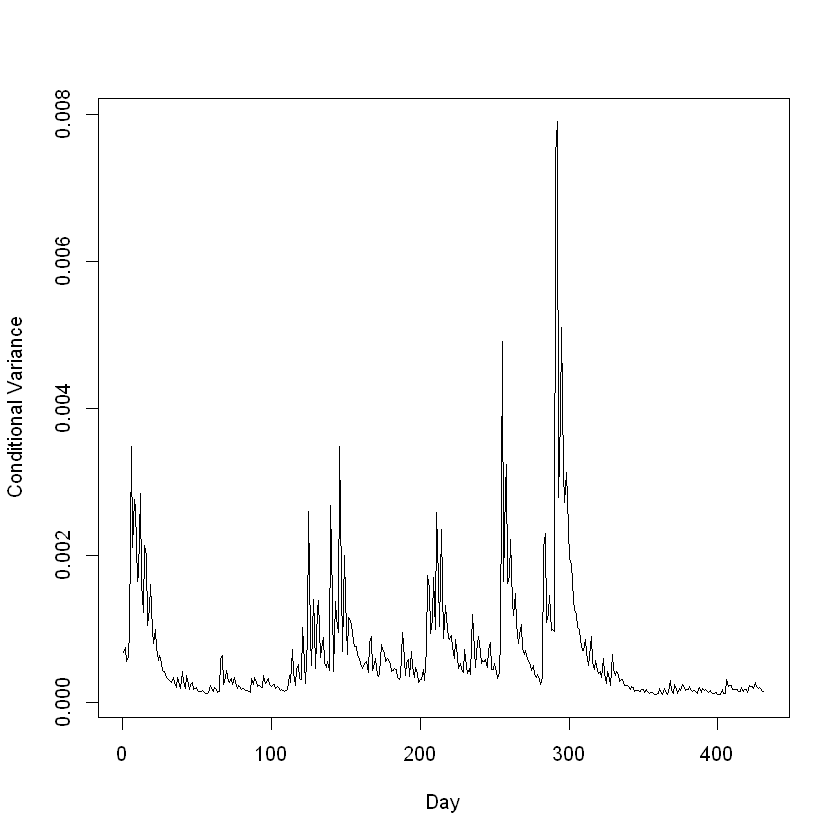

In [90]:
plot(ts(usd.hkd$v,freq=1),type='l',xlab='Day',ylab='Conditional Variance')